In [5]:
# Importing Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
import sklearn
import gensim

from itertools import islice
from wordcloud import WordCloud


%matplotlib inline



In [1]:


# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install wordcloud

# python -m spacy download en_core_web_sm

In [5]:
LocationTrue = r'./True.csv'
LocationFake = r'./Fake.csv'

dfTrue = pd.read_csv(LocationTrue)
dfFake = pd.read_csv(LocationFake)

### Preprocessing

In [16]:
# remove stopwords
def removeStopwords(string, stopwords):
    for w in stopwords:
        string.replace(w, '')

    return string


def tokenize_lemmatize(string):
    text = nltk.WhitespaceTokenizer().tokenize(string)
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    for i in range(len(text)):
        text[i] = lemmatizer.lemmatize(text[i])
    
    print(text)
    newText = " ".join(text)

    return newText
    
    
    
# text = "I can't don't it any more"

# print( tokenize_lemmatize(text))




def preprocessing(dataframe):
    symbols = "[!\"#$%&()*+-./:;<=>?@[\]^_`{|}'~\n]"
    
    dataframe['title'] = dataframe['title'].lower()
#     dataframe['title'] = dataframe['title'].str.replace(symbols, '', regex=True)
    
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
        
        
        
        
        
    dataframe['text'] = dataframe['text'].lower()
#     dataframe['text'] = dataframe['text'].str.replace(symbols, '', regex=True)

# preprocessing(dfTrue)
# preprocessing(dfFake)
dfTrue

['I', "can't", "don't", 'it', 'any', 'more']
I can't don't it any more


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
titles = dfTrue['title'].tolist()
texts = dfTrue['text'].tolist()

<!-- https://lena-voita.github.io/nlp_course/word_embeddings.html
https://github.com/kavgan/nlp-in-practice/blob/master/tf-idf/Keyword%20Extraction%20with%20TF-IDF%20and%20SKlearn.ipynb
https://web.stanford.edu/~jurafsky/slp3/slides/LM_4.pdf -->

https://towardsdatascience.com/keyword-extraction-with-bert-724efca412ea

### True news WordCloud

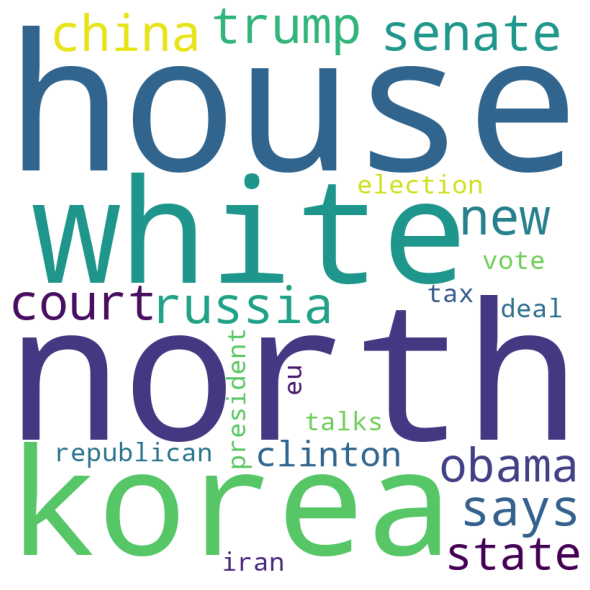

In [7]:
from sklearn.feature_extraction.text import CountVectorizer


titles_true = dfTrue['title'].tolist()

dicTrueTitle = {}

n_gram_range = (1, 2)
stop_words = "english"

for i in range(len(titles_true)):
    count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([titles_true[i]])
    candidates = count.get_feature_names()
    for w in candidates:
        if w in dicTrueTitle:
            dicTrueTitle[w] += 1
        else:
            dicTrueTitle[w] = 1

dicTrueTitle = dict(sorted(dicTrueTitle.items(), key=lambda item: item[1], reverse=True))
# n_items = list(dic.keys())

n_items = list(islice(dicTrueTitle, 25))



# Create the wordcloud
comment_words = ''
for i in range(len(n_items)):
        n_items[i] = n_items[i].lower()
      
comment_words += " ".join(n_items)+" "
    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Fake News WordCloud

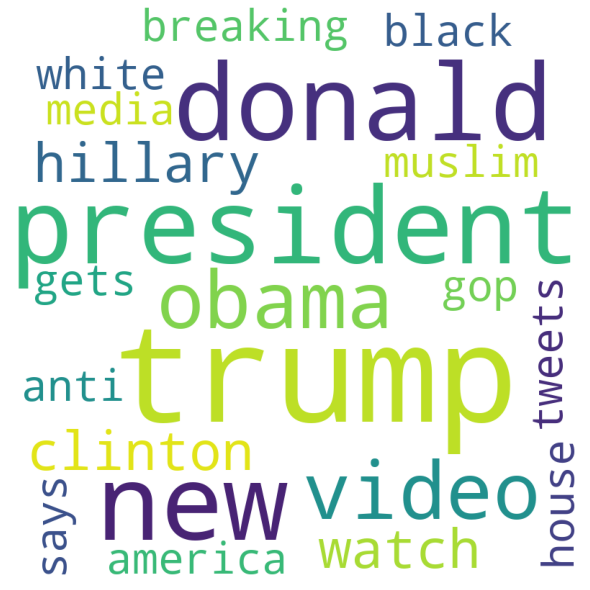

In [8]:
from sklearn.feature_extraction.text import CountVectorizer


titles_Fake = dfFake['title'].tolist()

dicFakeTitle = {}

n_gram_range = (1, 2)
stop_words = "english"

for i in range(len(titles_Fake)):
    count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([titles_Fake[i]])
    candidates = count.get_feature_names()
    for w in candidates:
        if w in dicFakeTitle:
            dicFakeTitle[w] += 1
        else:
            dicFakeTitle[w] = 1

dicFakeTitle = dict(sorted(dicFakeTitle.items(), key=lambda item: item[1], reverse=True))
# n_items = list(dic.keys())

n_items = list(islice(dicFakeTitle, 25))

comment_words = ''
for i in range(len(n_items)):
        n_items[i] = n_items[i].lower()
      
comment_words += " ".join(n_items)+" "
    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Ερωτημα Ε

In [ ]:
#number of Most common Bygrams we want to show
n = 20

#### Bygrams Gia True Titles

In [24]:
nBygramsTrueTitles = list(islice(dicTrueTitle, len(dicTrueTitle)))

def keepBygrams(string):
    if ' ' in string:
        return True
    return False

nBygramsTrueTitles = list(filter(keepBygrams, nBygramsTrueTitles))

nBygramsTrueTitles = list(islice(nBygramsTrueTitles, n))
print(nBygramsTrueTitles)



['white house', 'north korea', 'trump says', 'islamic state', 'supreme court', 'puerto rico', 'south korea', 'travel ban', 'says trump', 'trump administration', 'factbox trump', 'house speaker', 'new york', 'nuclear deal', 'russia probe', 'foreign minister', 'trump twitter', 'attorney general', 'north korean', 'saudi arabia']


#### Bygrams gia Fake Title

In [26]:
nBygramsFakeTitles = list(islice(dicFakeTitle, len(dicFakeTitle)))

nBygramsFakeTitles = list(filter(keepBygrams,nBygramsFakeTitles))

nBygramsFakeTitles = list(islice(nBygramsFakeTitles, n))
print(nBygramsFakeTitles)


['donald trump', 'president trump', 'hillary clinton', 'white house', 'fox news', 'trump video', 'anti trump', 'bernie sanders', 'ted cruz', 'trump just', 'trump supporter', 'trump supporters', 'president obama', 'lives matter', 'supreme court', 'black lives', 'yr old', 'watch trump', 'year old', 'fake news']


#### Bygrams Gia True Text

In [15]:
dicTrueText = {}
textTrue = dfTrue['text'].tolist()

n_gram_range = (2, 2)
stop_words = "english"

for i in range(len(textTrue)):
    try:
        count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([textTrue[i]])
        candidates = count.get_feature_names()
        for w in candidates:
            if w in dicTrueText:
                dicTrueText[w] += 1
            else:
                dicTrueText[w] = 1
    except:
        continue

dicTrueText = dict(sorted(dicTrueText.items(), key=lambda item: item[1], reverse=True))

nBygramsTrueText = list(islice(dicTrueText, n))

print('These are the ', str(n), ' most common Bygrams in the True News Text Segment')
print(nBygramsTrueText)



These are the  20  most common Bygrams in the True News Text Segment
['donald trump', 'washington reuters', 'united states', 'president donald', 'white house', 'said statement', 'barack obama', 'prime minister', 'president barack', 'new york', 'told reporters', 'told reuters', 'reuters president', 'trump said', 'house representatives', 'hillary clinton', 'secretary state', 'year old', 'trump administration', 'said wednesday']


#### Bygrams gia Fake Text

In [27]:
dicFakeText = {}
textFake = dfFake['text'].tolist()

for i in range(len(textTrue)):
    try:
        count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([textFake[i]])
        candidates = count.get_feature_names()
        for w in candidates:
            if w in dicFakeText:
                dicFakeText[w] += 1
            else:
                dicFakeText[w] = 1
    except:
        continue

dicFakeText = dict(sorted(dicFakeText.items(), key=lambda item: item[1], reverse=True))

nBygramsFakeText = list(islice(dicFakeText, n))

print('These are the ', str(n), ' most common Bygrams in the Fake News Text Segment')
print(nBygramsFakeText)


These are the  20  most common Bygrams in the Fake News Text Segment
['donald trump', 'featured image', 'getty images', 'hillary clinton', 'united states', 'twitter com', 'white house', 'pic twitter', 'new york', 'president trump', 'president obama', 'fox news', 'year old', 'barack obama', 'screen capture', 'trump campaign', 'trump said', 'american people', 'social media', 'republican party']


In [5]:
# dfTrue
#dfFalse

tempTrue = dfTrue.copy()
tempFake = dfFake.copy()

tempTrue['label'] = 1
tempFake['label'] = 0

tempFake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [17]:

newdf = tempTrue.copy()

newdf = newdf.append(tempFake, ignore_index=True)

# df = df.sample(frac=1).reset_index(drop=True)
newdf = newdf.sample(frac=1).reset_index(drop=True)

newdf = newdf.iloc[:1000,:]

train, test = np.split(newdf, [int(.1*len(newdf))])



In [16]:
train.to_csv('./train.csv', index=True)
test.to_csv('./test.csv', index=True)

https://medium.com/analytics-vidhya/applying-text-classification-using-logistic-regression-a-comparison-between-bow-and-tf-idf-1f1ed1b83640

In [ ]:
# Prepare data for word2vec

# tokenize text
# give the right arguments to word2vec
# train it
# use t-SNE or PCA to reduce density



We Try this tutorial
https://www.kaggle.com/shahkan/text-classification-using-logistic-regression

In [ ]:
#

vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
final_features.shape

